# 1. Read Knowledge Sources

In [1]:
from PyPDF2 import PdfReader
import os

source_folderpath = "../resources/Wissensquellen_ChatBot/"

In [2]:
def pdf_to_text(pdf_file):
    filepath_pdf = source_folderpath + pdf_file
    filepath_txt = source_folderpath + "text_files/" + pdf_file[:-4] + ".txt"
    reader = PdfReader(filepath_pdf)

    print(f"Writing: {filepath_pdf} to {filepath_txt}")
    with open(filepath_txt, 'w', encoding='utf-8') as f:
        pages = reader.pages
        for page in pages:
            text = page.extract_text()
            f.write(text)
            f.write("\n")
    print("Complete")

for file in os.listdir(source_folderpath):
    if file.endswith(".pdf"):
        pdf_to_text(file)

Writing: ../resources/Wissensquellen_ChatBot/CELEX_02013L0036-20220101_DE_TXT.pdf to ../resources/Wissensquellen_ChatBot/text_files/CELEX_02013L0036-20220101_DE_TXT.txt
Complete
Writing: ../resources/Wissensquellen_ChatBot/CELEX_02013R0575-20230628_DE_TXT.pdf to ../resources/Wissensquellen_ChatBot/text_files/CELEX_02013R0575-20230628_DE_TXT.txt
Complete
Writing: ../resources/Wissensquellen_ChatBot/KWG.pdf to ../resources/Wissensquellen_ChatBot/text_files/KWG.txt
Complete


# 2. Splitting

## character based

In [69]:
TEXT_FILES_FOLDER = "../resources/Wissensquellen_ChatBot/text_files/"
SPLITS_FOLDER = "../resources/splits/"
KNOWLEDGE_TEXT_FILENAMES = [file for file in os.listdir(TEXT_FILES_FOLDER)]

In [70]:
from langchain_text_splitters import CharacterTextSplitter
import pandas as pd

def text_to_splits(filepath: str , char_splitter: CharacterTextSplitter):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
        chunks = char_splitter.split_text(text)
    return chunks

def persist_splits(chunks, json_path):
    df = pd.DataFrame(columns=['splits'], data=chunks)
    print(df.shape)
    df.to_json(json_path)

def execute_splitter(splitter, splitter_folder_name):
    splitter_folder_path = SPLITS_FOLDER + splitter_folder_name
    if not os.path.exists(splitter_folder_path):
        os.makedirs(splitter_folder_path)
    
    for file_name in KNOWLEDGE_TEXT_FILENAMES:
        print(f"Splitting {file_name}")
        filepath = TEXT_FILES_FOLDER + file_name
        json_path = splitter_folder_path + file_name[:-4] + ".json"
        chunks = text_to_splits(filepath, splitter)
        print(f"Completed")
        print(f"Persisting {file_name}")
        persist_splits(chunks=chunks, json_path=json_path)
        print(f"Completed")

### 128 character Split

In [71]:
splitter_folder_name = "char_splitter_128_o0/"
char_splitter_128_o0 = CharacterTextSplitter(
    separator="", # set to "" to ignore the seperator
    chunk_size=128, # max. len chunk uses seperator AND chunk_size
    chunk_overlap=0, 
    length_function=len, 
    is_separator_regex=False 
)

execute_splitter(char_splitter_128_o0, splitter_folder_name)

Splitting CELEX_02013L0036-20220101_DE_TXT.txt
Completed
Persisting CELEX_02013L0036-20220101_DE_TXT.txt
(3724, 1)
Completed
Splitting CELEX_02013R0575-20230628_DE_TXT.txt
Completed
Persisting CELEX_02013R0575-20230628_DE_TXT.txt
(16041, 1)
Completed
Splitting KWG.txt
Completed
Persisting KWG.txt
(6917, 1)
Completed


### 256 character Split

In [72]:
splitter_folder_name = "char_splitter_256_o0/"
char_splitter_256_o0 = CharacterTextSplitter(
    separator="", # set to "" to ignore the seperator
    chunk_size=256, # max. len chunk uses seperator AND chunk_size
    chunk_overlap=0, 
    length_function=len, 
    is_separator_regex=False 
)

execute_splitter(char_splitter_256_o0, splitter_folder_name)

Splitting CELEX_02013L0036-20220101_DE_TXT.txt
Completed
Persisting CELEX_02013L0036-20220101_DE_TXT.txt
(1862, 1)
Completed
Splitting CELEX_02013R0575-20230628_DE_TXT.txt
Completed
Persisting CELEX_02013R0575-20230628_DE_TXT.txt
(8021, 1)
Completed
Splitting KWG.txt
Completed
Persisting KWG.txt
(3459, 1)
Completed


### 512 character Split

In [73]:
splitter_folder_name = "char_splitter_512_o0/"
char_splitter_512_o0 = CharacterTextSplitter(
    separator="", # set to "" to ignore the seperator
    chunk_size=512, # max. len chunk uses seperator AND chunk_size
    chunk_overlap=0, 
    length_function=len, 
    is_separator_regex=False 
)

execute_splitter(char_splitter_512_o0, splitter_folder_name)

Splitting CELEX_02013L0036-20220101_DE_TXT.txt
Completed
Persisting CELEX_02013L0036-20220101_DE_TXT.txt
(931, 1)
Completed
Splitting CELEX_02013R0575-20230628_DE_TXT.txt
Completed
Persisting CELEX_02013R0575-20230628_DE_TXT.txt
(4011, 1)
Completed
Splitting KWG.txt
Completed
Persisting KWG.txt
(1730, 1)
Completed


### 1024 character Split

In [75]:
splitter_folder_name = "char_splitter_1024_o0/"
char_splitter_1024_o0 = CharacterTextSplitter(
    separator="", # set to "" to ignore the seperator
    chunk_size=1024, # max. len chunk uses seperator AND chunk_size
    chunk_overlap=0, 
    length_function=len, 
    is_separator_regex=False 
)

execute_splitter(char_splitter_1024_o0, splitter_folder_name)

Splitting CELEX_02013L0036-20220101_DE_TXT.txt
Completed
Persisting CELEX_02013L0036-20220101_DE_TXT.txt
(466, 1)
Completed
Splitting CELEX_02013R0575-20230628_DE_TXT.txt
Completed
Persisting CELEX_02013R0575-20230628_DE_TXT.txt
(2006, 1)
Completed
Splitting KWG.txt
Completed
Persisting KWG.txt
(865, 1)
Completed


## LLamaSherpa LayoutPDF Reader Split

## 'Artikel' Split

## Artikel Unterpunkte (Nummerierung) Split

## Adobe PDF Extract API (get PDF Elements and Structure in json format)

https://developer.adobe.com/document-services/docs/overview/pdf-extract-api/quickstarts/python/
-> need to create adobe account

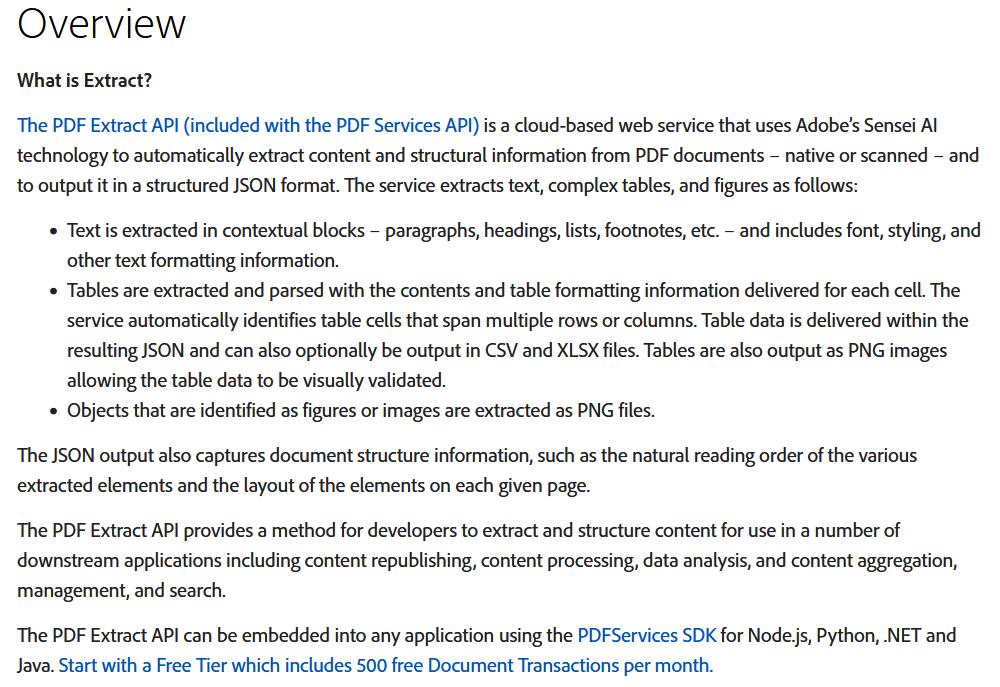

# 3. Persisting Splits

### importing required modules, specifying variables

### write each page to textfile

number of pages: 176


### LayoutPDFReader

In [4]:
from llmsherpa.readers import LayoutPDFReader
import html2text

llmsherpa_api_url = "https://readers.llmsherpa.com/api/document/developer/parseDocument?renderFormat=all"
pdf_reader = LayoutPDFReader(llmsherpa_api_url)
doc = pdf_reader.read_pdf(source_filepath)

In [5]:
print(doc.chunks()[11].to_html(include_children=True, recurse=True))
print("---")
print(doc.chunks()[12].to_html(include_children=True, recurse=True))

<p>Artikel 1</p>
---
<p>In dieser Richtlinie sind Vorschriften für folgende Bereiche festgelegt:<ul><li>a) Zugang zur Tätigkeit von Kreditinstituten,</li><li>b) Aufsichtsbefugnisse und Instrumente für die Beaufsichtigung von Kreditinstituten durch die zuständigen Behörden,</li><li>c) Beaufsichtigung von Kreditinstituten durch die zuständigen Behör­ den in einer Weise, die mit den Bestimmungen der Verordnung (EU) Nr.
575/2013 vereinbar ist,</li><li>d) Veröffentlichungspflichten für die im Bereich der Aufsichtsvorschrif­ ten und der Beaufsichtigung von Kreditinstituten zuständigen Behör­ den.</li></ul></p>


In [6]:
print(html2text.html2text(doc.chunks()[11].to_html(include_children=True, recurse=True)))
print("---")
print(html2text.html2text(doc.chunks()[12].to_html(include_children=True, recurse=True)))
print("---")
print(html2text.html2text(doc.chunks()[13].to_html(include_children=True, recurse=True)))
print("---")
print(html2text.html2text(doc.chunks()[14].to_html(include_children=True, recurse=True)))
print("---")
print(html2text.html2text(doc.chunks()[15].to_html(include_children=True, recurse=True)))

Artikel 1


---
In dieser Richtlinie sind Vorschriften für folgende Bereiche festgelegt:

  * a) Zugang zur Tätigkeit von Kreditinstituten,
  * b) Aufsichtsbefugnisse und Instrumente für die Beaufsichtigung von Kreditinstituten durch die zuständigen Behörden,
  * c) Beaufsichtigung von Kreditinstituten durch die zuständigen Behör­ den in einer Weise, die mit den Bestimmungen der Verordnung (EU) Nr. 575/2013 vereinbar ist,
  * d) Veröffentlichungspflichten für die im Bereich der Aufsichtsvorschrif­ ten und der Beaufsichtigung von Kreditinstituten zuständigen Behör­ den.


---
▼B


---
Artikel 2


---
* (1) Diese Richtlinie gilt für Institute.




In [10]:
HTML(doc.tables()[1].to_html())

ModuleNotFoundError: No module named 'HTML'

In [ ]:
for chunk in doc.chunks():
    print(chunk)
    # print(chunk.to_html(include_children=True, recurse=True))